## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.6ms	remaining: 48.5s
1:	learn: 0.9301086	total: 50.5ms	remaining: 25.2s
2:	learn: 0.9005637	total: 52.4ms	remaining: 17.4s
3:	learn: 0.8720983	total: 54.3ms	remaining: 13.5s
4:	learn: 0.8467410	total: 56.3ms	remaining: 11.2s
5:	learn: 0.8226672	total: 58.1ms	remaining: 9.63s
6:	learn: 0.7994702	total: 59.9ms	remaining: 8.5s
7:	learn: 0.7784272	total: 61.8ms	remaining: 7.66s
8:	learn: 0.7602192	total: 63.7ms	remaining: 7.01s
9:	learn: 0.7412421	total: 65.5ms	remaining: 6.49s
10:	learn: 0.7247930	total: 67.4ms	remaining: 6.06s
11:	learn: 0.7089951	total: 69.2ms	remaining: 5.7s
12:	learn: 0.6951345	total: 70.9ms	remaining: 5.38s
13:	learn: 0.6809276	total: 72.8ms	remaining: 5.13s
14:	learn: 0.6692630	total: 74.6ms	remaining: 4.9s
15:	learn: 0.6588323	total: 76.5ms	remaining: 4.71s
16:	learn: 0.6472700	total: 78.3ms	remaining: 4.53s
17:	learn: 0.6379982	total: 80.1ms	remaining: 4.37s
18:	learn: 0.6294674	total: 82.1ms	remaining: 4.24s
19:	learn: 0.6193295	tota

64:	learn: 0.4771984	total: 167ms	remaining: 2.4s
65:	learn: 0.4759610	total: 169ms	remaining: 2.39s
66:	learn: 0.4750287	total: 171ms	remaining: 2.38s
67:	learn: 0.4740093	total: 172ms	remaining: 2.36s
68:	learn: 0.4732612	total: 174ms	remaining: 2.35s
69:	learn: 0.4727266	total: 176ms	remaining: 2.34s
70:	learn: 0.4716549	total: 178ms	remaining: 2.33s
71:	learn: 0.4709088	total: 180ms	remaining: 2.31s
72:	learn: 0.4697594	total: 182ms	remaining: 2.31s
73:	learn: 0.4690934	total: 184ms	remaining: 2.3s
74:	learn: 0.4680942	total: 185ms	remaining: 2.29s
75:	learn: 0.4672726	total: 187ms	remaining: 2.28s
76:	learn: 0.4664479	total: 189ms	remaining: 2.27s
77:	learn: 0.4656044	total: 191ms	remaining: 2.26s
78:	learn: 0.4645375	total: 193ms	remaining: 2.25s
79:	learn: 0.4639654	total: 195ms	remaining: 2.24s
80:	learn: 0.4628457	total: 196ms	remaining: 2.23s
81:	learn: 0.4620203	total: 198ms	remaining: 2.22s
82:	learn: 0.4608838	total: 200ms	remaining: 2.21s
83:	learn: 0.4604376	total: 202ms

89:	learn: 0.4569360	total: 213ms	remaining: 2.15s
90:	learn: 0.4559969	total: 215ms	remaining: 2.15s
91:	learn: 0.4549716	total: 217ms	remaining: 2.14s
92:	learn: 0.4544919	total: 219ms	remaining: 2.13s
93:	learn: 0.4537693	total: 221ms	remaining: 2.13s
94:	learn: 0.4532673	total: 223ms	remaining: 2.12s
95:	learn: 0.4526987	total: 224ms	remaining: 2.11s
96:	learn: 0.4520952	total: 226ms	remaining: 2.11s
97:	learn: 0.4513919	total: 228ms	remaining: 2.1s
98:	learn: 0.4503747	total: 230ms	remaining: 2.09s
99:	learn: 0.4494783	total: 232ms	remaining: 2.09s
100:	learn: 0.4487329	total: 234ms	remaining: 2.08s
101:	learn: 0.4481325	total: 236ms	remaining: 2.08s
102:	learn: 0.4475445	total: 238ms	remaining: 2.07s
103:	learn: 0.4466014	total: 240ms	remaining: 2.06s
104:	learn: 0.4461730	total: 241ms	remaining: 2.06s
105:	learn: 0.4457259	total: 243ms	remaining: 2.05s
106:	learn: 0.4451085	total: 245ms	remaining: 2.04s
107:	learn: 0.4447909	total: 247ms	remaining: 2.04s
108:	learn: 0.4440936	to

153:	learn: 0.4233079	total: 334ms	remaining: 1.83s
154:	learn: 0.4228876	total: 336ms	remaining: 1.83s
155:	learn: 0.4225404	total: 338ms	remaining: 1.83s
156:	learn: 0.4222831	total: 340ms	remaining: 1.82s
157:	learn: 0.4218088	total: 341ms	remaining: 1.82s
158:	learn: 0.4213239	total: 343ms	remaining: 1.82s
159:	learn: 0.4210022	total: 345ms	remaining: 1.81s
160:	learn: 0.4201256	total: 347ms	remaining: 1.81s
161:	learn: 0.4197073	total: 349ms	remaining: 1.81s
162:	learn: 0.4192052	total: 351ms	remaining: 1.8s
163:	learn: 0.4187949	total: 353ms	remaining: 1.8s
164:	learn: 0.4184572	total: 355ms	remaining: 1.79s
165:	learn: 0.4180680	total: 357ms	remaining: 1.79s
166:	learn: 0.4176884	total: 359ms	remaining: 1.79s
167:	learn: 0.4173026	total: 361ms	remaining: 1.78s
168:	learn: 0.4170486	total: 362ms	remaining: 1.78s
169:	learn: 0.4165960	total: 364ms	remaining: 1.78s
170:	learn: 0.4161870	total: 366ms	remaining: 1.77s
171:	learn: 0.4156228	total: 368ms	remaining: 1.77s
172:	learn: 0.

176:	learn: 0.4136755	total: 377ms	remaining: 1.75s
177:	learn: 0.4133860	total: 379ms	remaining: 1.75s
178:	learn: 0.4129780	total: 381ms	remaining: 1.75s
179:	learn: 0.4122907	total: 383ms	remaining: 1.75s
180:	learn: 0.4119188	total: 385ms	remaining: 1.74s
181:	learn: 0.4115412	total: 387ms	remaining: 1.74s
182:	learn: 0.4112620	total: 389ms	remaining: 1.74s
183:	learn: 0.4107734	total: 391ms	remaining: 1.73s
184:	learn: 0.4104881	total: 392ms	remaining: 1.73s
185:	learn: 0.4100009	total: 394ms	remaining: 1.73s
186:	learn: 0.4096453	total: 396ms	remaining: 1.72s
187:	learn: 0.4093395	total: 398ms	remaining: 1.72s
188:	learn: 0.4090020	total: 400ms	remaining: 1.72s
189:	learn: 0.4085981	total: 402ms	remaining: 1.71s
190:	learn: 0.4082397	total: 403ms	remaining: 1.71s
191:	learn: 0.4079846	total: 405ms	remaining: 1.71s
192:	learn: 0.4076364	total: 407ms	remaining: 1.7s
193:	learn: 0.4069970	total: 409ms	remaining: 1.7s
194:	learn: 0.4066685	total: 411ms	remaining: 1.7s
195:	learn: 0.4

242:	learn: 0.3928898	total: 500ms	remaining: 1.56s
243:	learn: 0.3926199	total: 502ms	remaining: 1.55s
244:	learn: 0.3923955	total: 503ms	remaining: 1.55s
245:	learn: 0.3922312	total: 505ms	remaining: 1.55s
246:	learn: 0.3919499	total: 507ms	remaining: 1.55s
247:	learn: 0.3917420	total: 509ms	remaining: 1.54s
248:	learn: 0.3915186	total: 511ms	remaining: 1.54s
249:	learn: 0.3912759	total: 512ms	remaining: 1.54s
250:	learn: 0.3908375	total: 514ms	remaining: 1.53s
251:	learn: 0.3904815	total: 516ms	remaining: 1.53s
252:	learn: 0.3902127	total: 518ms	remaining: 1.53s
253:	learn: 0.3900274	total: 520ms	remaining: 1.53s
254:	learn: 0.3898171	total: 522ms	remaining: 1.52s
255:	learn: 0.3896180	total: 523ms	remaining: 1.52s
256:	learn: 0.3894251	total: 525ms	remaining: 1.52s
257:	learn: 0.3892139	total: 527ms	remaining: 1.52s
258:	learn: 0.3889352	total: 529ms	remaining: 1.51s
259:	learn: 0.3886531	total: 531ms	remaining: 1.51s
260:	learn: 0.3884539	total: 533ms	remaining: 1.51s
261:	learn: 

266:	learn: 0.3868515	total: 544ms	remaining: 1.49s
267:	learn: 0.3866114	total: 546ms	remaining: 1.49s
268:	learn: 0.3863119	total: 548ms	remaining: 1.49s
269:	learn: 0.3860579	total: 550ms	remaining: 1.49s
270:	learn: 0.3858830	total: 552ms	remaining: 1.48s
271:	learn: 0.3857050	total: 554ms	remaining: 1.48s
272:	learn: 0.3855021	total: 556ms	remaining: 1.48s
273:	learn: 0.3852614	total: 557ms	remaining: 1.48s
274:	learn: 0.3851459	total: 559ms	remaining: 1.47s
275:	learn: 0.3849180	total: 561ms	remaining: 1.47s
276:	learn: 0.3846590	total: 563ms	remaining: 1.47s
277:	learn: 0.3844409	total: 565ms	remaining: 1.47s
278:	learn: 0.3842433	total: 567ms	remaining: 1.46s
279:	learn: 0.3840246	total: 569ms	remaining: 1.46s
280:	learn: 0.3839018	total: 570ms	remaining: 1.46s
281:	learn: 0.3836780	total: 572ms	remaining: 1.46s
282:	learn: 0.3832767	total: 574ms	remaining: 1.45s
283:	learn: 0.3831676	total: 576ms	remaining: 1.45s
284:	learn: 0.3830010	total: 578ms	remaining: 1.45s
285:	learn: 

328:	learn: 0.3743710	total: 664ms	remaining: 1.35s
329:	learn: 0.3741679	total: 666ms	remaining: 1.35s
330:	learn: 0.3738646	total: 668ms	remaining: 1.35s
331:	learn: 0.3736647	total: 670ms	remaining: 1.35s
332:	learn: 0.3733429	total: 671ms	remaining: 1.34s
333:	learn: 0.3732059	total: 673ms	remaining: 1.34s
334:	learn: 0.3730574	total: 675ms	remaining: 1.34s
335:	learn: 0.3728663	total: 677ms	remaining: 1.34s
336:	learn: 0.3727111	total: 679ms	remaining: 1.33s
337:	learn: 0.3724765	total: 681ms	remaining: 1.33s
338:	learn: 0.3722959	total: 683ms	remaining: 1.33s
339:	learn: 0.3720213	total: 684ms	remaining: 1.33s
340:	learn: 0.3718316	total: 686ms	remaining: 1.33s
341:	learn: 0.3716519	total: 688ms	remaining: 1.32s
342:	learn: 0.3714592	total: 690ms	remaining: 1.32s
343:	learn: 0.3713389	total: 693ms	remaining: 1.32s
344:	learn: 0.3711642	total: 695ms	remaining: 1.32s
345:	learn: 0.3709569	total: 697ms	remaining: 1.32s
346:	learn: 0.3708184	total: 699ms	remaining: 1.31s
347:	learn: 

351:	learn: 0.3698930	total: 709ms	remaining: 1.3s
352:	learn: 0.3697314	total: 711ms	remaining: 1.3s
353:	learn: 0.3695617	total: 713ms	remaining: 1.3s
354:	learn: 0.3694397	total: 714ms	remaining: 1.3s
355:	learn: 0.3692589	total: 716ms	remaining: 1.29s
356:	learn: 0.3691107	total: 718ms	remaining: 1.29s
357:	learn: 0.3689645	total: 720ms	remaining: 1.29s
358:	learn: 0.3687886	total: 722ms	remaining: 1.29s
359:	learn: 0.3686485	total: 724ms	remaining: 1.29s
360:	learn: 0.3685749	total: 725ms	remaining: 1.28s
361:	learn: 0.3683909	total: 727ms	remaining: 1.28s
362:	learn: 0.3682710	total: 729ms	remaining: 1.28s
363:	learn: 0.3681254	total: 731ms	remaining: 1.28s
364:	learn: 0.3679761	total: 733ms	remaining: 1.27s
365:	learn: 0.3677932	total: 735ms	remaining: 1.27s
366:	learn: 0.3676022	total: 737ms	remaining: 1.27s
367:	learn: 0.3674148	total: 740ms	remaining: 1.27s
368:	learn: 0.3673439	total: 741ms	remaining: 1.27s
369:	learn: 0.3671985	total: 743ms	remaining: 1.26s
370:	learn: 0.36

415:	learn: 0.3595791	total: 830ms	remaining: 1.17s
416:	learn: 0.3594487	total: 832ms	remaining: 1.16s
417:	learn: 0.3592759	total: 834ms	remaining: 1.16s
418:	learn: 0.3591088	total: 836ms	remaining: 1.16s
419:	learn: 0.3589470	total: 837ms	remaining: 1.16s
420:	learn: 0.3587972	total: 839ms	remaining: 1.15s
421:	learn: 0.3586831	total: 841ms	remaining: 1.15s
422:	learn: 0.3585620	total: 843ms	remaining: 1.15s
423:	learn: 0.3584427	total: 845ms	remaining: 1.15s
424:	learn: 0.3583044	total: 847ms	remaining: 1.15s
425:	learn: 0.3581698	total: 849ms	remaining: 1.14s
426:	learn: 0.3580461	total: 851ms	remaining: 1.14s
427:	learn: 0.3579182	total: 853ms	remaining: 1.14s
428:	learn: 0.3577521	total: 854ms	remaining: 1.14s
429:	learn: 0.3576138	total: 856ms	remaining: 1.14s
430:	learn: 0.3575528	total: 858ms	remaining: 1.13s
431:	learn: 0.3574686	total: 860ms	remaining: 1.13s
432:	learn: 0.3572923	total: 862ms	remaining: 1.13s
433:	learn: 0.3571859	total: 864ms	remaining: 1.13s
434:	learn: 

438:	learn: 0.3564768	total: 874ms	remaining: 1.12s
439:	learn: 0.3563559	total: 876ms	remaining: 1.11s
440:	learn: 0.3561557	total: 878ms	remaining: 1.11s
441:	learn: 0.3559793	total: 880ms	remaining: 1.11s
442:	learn: 0.3558695	total: 882ms	remaining: 1.11s
443:	learn: 0.3557039	total: 883ms	remaining: 1.11s
444:	learn: 0.3555934	total: 885ms	remaining: 1.1s
445:	learn: 0.3553700	total: 887ms	remaining: 1.1s
446:	learn: 0.3553048	total: 889ms	remaining: 1.1s
447:	learn: 0.3550824	total: 891ms	remaining: 1.1s
448:	learn: 0.3549146	total: 893ms	remaining: 1.09s
449:	learn: 0.3548607	total: 894ms	remaining: 1.09s
450:	learn: 0.3546809	total: 896ms	remaining: 1.09s
451:	learn: 0.3545787	total: 898ms	remaining: 1.09s
452:	learn: 0.3544310	total: 900ms	remaining: 1.09s
453:	learn: 0.3543210	total: 902ms	remaining: 1.08s
454:	learn: 0.3541744	total: 904ms	remaining: 1.08s
455:	learn: 0.3540636	total: 906ms	remaining: 1.08s
456:	learn: 0.3538004	total: 908ms	remaining: 1.08s
457:	learn: 0.35

501:	learn: 0.3476142	total: 992ms	remaining: 984ms
502:	learn: 0.3474667	total: 994ms	remaining: 982ms
503:	learn: 0.3473844	total: 996ms	remaining: 980ms
504:	learn: 0.3471852	total: 998ms	remaining: 978ms
505:	learn: 0.3471124	total: 1s	remaining: 977ms
506:	learn: 0.3469987	total: 1s	remaining: 975ms
507:	learn: 0.3469000	total: 1s	remaining: 972ms
508:	learn: 0.3467621	total: 1s	remaining: 970ms
509:	learn: 0.3466653	total: 1.01s	remaining: 968ms
510:	learn: 0.3465795	total: 1.01s	remaining: 966ms
511:	learn: 0.3464899	total: 1.01s	remaining: 964ms
512:	learn: 0.3463711	total: 1.01s	remaining: 962ms
513:	learn: 0.3462483	total: 1.01s	remaining: 960ms
514:	learn: 0.3460733	total: 1.02s	remaining: 958ms
515:	learn: 0.3459427	total: 1.02s	remaining: 956ms
516:	learn: 0.3458363	total: 1.02s	remaining: 954ms
517:	learn: 0.3456145	total: 1.02s	remaining: 952ms
518:	learn: 0.3455174	total: 1.02s	remaining: 950ms
519:	learn: 0.3453867	total: 1.03s	remaining: 948ms
520:	learn: 0.3453067	to

524:	learn: 0.3447174	total: 1.03s	remaining: 937ms
525:	learn: 0.3446114	total: 1.04s	remaining: 935ms
526:	learn: 0.3444940	total: 1.04s	remaining: 933ms
527:	learn: 0.3443508	total: 1.04s	remaining: 931ms
528:	learn: 0.3442153	total: 1.04s	remaining: 929ms
529:	learn: 0.3441108	total: 1.04s	remaining: 927ms
530:	learn: 0.3439546	total: 1.05s	remaining: 925ms
531:	learn: 0.3438254	total: 1.05s	remaining: 923ms
532:	learn: 0.3437049	total: 1.05s	remaining: 921ms
533:	learn: 0.3435053	total: 1.05s	remaining: 919ms
534:	learn: 0.3433236	total: 1.05s	remaining: 916ms
535:	learn: 0.3432219	total: 1.06s	remaining: 914ms
536:	learn: 0.3431615	total: 1.06s	remaining: 912ms
537:	learn: 0.3430198	total: 1.06s	remaining: 910ms
538:	learn: 0.3429422	total: 1.06s	remaining: 908ms
539:	learn: 0.3428024	total: 1.06s	remaining: 906ms
540:	learn: 0.3426641	total: 1.06s	remaining: 904ms
541:	learn: 0.3425885	total: 1.07s	remaining: 902ms
542:	learn: 0.3424695	total: 1.07s	remaining: 900ms
543:	learn: 

588:	learn: 0.3375696	total: 1.16s	remaining: 806ms
589:	learn: 0.3374902	total: 1.16s	remaining: 804ms
590:	learn: 0.3373056	total: 1.16s	remaining: 802ms
591:	learn: 0.3371913	total: 1.16s	remaining: 800ms
592:	learn: 0.3371272	total: 1.16s	remaining: 798ms
593:	learn: 0.3370368	total: 1.16s	remaining: 796ms
594:	learn: 0.3368150	total: 1.17s	remaining: 794ms
595:	learn: 0.3367491	total: 1.17s	remaining: 792ms
596:	learn: 0.3366496	total: 1.17s	remaining: 790ms
597:	learn: 0.3365561	total: 1.17s	remaining: 788ms
598:	learn: 0.3364801	total: 1.17s	remaining: 786ms
599:	learn: 0.3363937	total: 1.18s	remaining: 784ms
600:	learn: 0.3363054	total: 1.18s	remaining: 781ms
601:	learn: 0.3361892	total: 1.18s	remaining: 779ms
602:	learn: 0.3360683	total: 1.18s	remaining: 777ms
603:	learn: 0.3359807	total: 1.18s	remaining: 775ms
604:	learn: 0.3359096	total: 1.18s	remaining: 773ms
605:	learn: 0.3358268	total: 1.19s	remaining: 771ms
606:	learn: 0.3356597	total: 1.19s	remaining: 769ms
607:	learn: 

612:	learn: 0.3351155	total: 1.2s	remaining: 758ms
613:	learn: 0.3350041	total: 1.2s	remaining: 756ms
614:	learn: 0.3349098	total: 1.2s	remaining: 754ms
615:	learn: 0.3348304	total: 1.21s	remaining: 752ms
616:	learn: 0.3347009	total: 1.21s	remaining: 749ms
617:	learn: 0.3346458	total: 1.21s	remaining: 747ms
618:	learn: 0.3345381	total: 1.21s	remaining: 745ms
619:	learn: 0.3344101	total: 1.21s	remaining: 744ms
620:	learn: 0.3343267	total: 1.21s	remaining: 741ms
621:	learn: 0.3342275	total: 1.22s	remaining: 739ms
622:	learn: 0.3341456	total: 1.22s	remaining: 737ms
623:	learn: 0.3340640	total: 1.22s	remaining: 735ms
624:	learn: 0.3339122	total: 1.22s	remaining: 733ms
625:	learn: 0.3337503	total: 1.22s	remaining: 731ms
626:	learn: 0.3336593	total: 1.23s	remaining: 729ms
627:	learn: 0.3335713	total: 1.23s	remaining: 727ms
628:	learn: 0.3333915	total: 1.23s	remaining: 725ms
629:	learn: 0.3333158	total: 1.23s	remaining: 723ms
630:	learn: 0.3332088	total: 1.23s	remaining: 721ms
631:	learn: 0.3

677:	learn: 0.3284620	total: 1.32s	remaining: 627ms
678:	learn: 0.3283999	total: 1.32s	remaining: 626ms
679:	learn: 0.3283506	total: 1.32s	remaining: 624ms
680:	learn: 0.3282208	total: 1.33s	remaining: 622ms
681:	learn: 0.3281020	total: 1.33s	remaining: 620ms
682:	learn: 0.3280328	total: 1.33s	remaining: 618ms
683:	learn: 0.3279574	total: 1.33s	remaining: 616ms
684:	learn: 0.3278928	total: 1.33s	remaining: 614ms
685:	learn: 0.3278094	total: 1.34s	remaining: 612ms
686:	learn: 0.3277178	total: 1.34s	remaining: 610ms
687:	learn: 0.3276684	total: 1.34s	remaining: 608ms
688:	learn: 0.3275537	total: 1.34s	remaining: 606ms
689:	learn: 0.3274808	total: 1.34s	remaining: 604ms
690:	learn: 0.3273839	total: 1.34s	remaining: 602ms
691:	learn: 0.3272773	total: 1.35s	remaining: 600ms
692:	learn: 0.3272088	total: 1.35s	remaining: 598ms
693:	learn: 0.3271216	total: 1.35s	remaining: 596ms
694:	learn: 0.3270566	total: 1.35s	remaining: 594ms
695:	learn: 0.3269516	total: 1.35s	remaining: 592ms
696:	learn: 

700:	learn: 0.3264350	total: 1.36s	remaining: 582ms
701:	learn: 0.3263223	total: 1.37s	remaining: 580ms
702:	learn: 0.3262539	total: 1.37s	remaining: 578ms
703:	learn: 0.3261258	total: 1.37s	remaining: 576ms
704:	learn: 0.3260520	total: 1.37s	remaining: 574ms
705:	learn: 0.3259475	total: 1.37s	remaining: 572ms
706:	learn: 0.3258911	total: 1.38s	remaining: 570ms
707:	learn: 0.3257903	total: 1.38s	remaining: 568ms
708:	learn: 0.3256952	total: 1.38s	remaining: 566ms
709:	learn: 0.3255982	total: 1.38s	remaining: 564ms
710:	learn: 0.3255301	total: 1.38s	remaining: 562ms
711:	learn: 0.3254442	total: 1.39s	remaining: 560ms
712:	learn: 0.3253361	total: 1.39s	remaining: 558ms
713:	learn: 0.3252431	total: 1.39s	remaining: 557ms
714:	learn: 0.3251186	total: 1.39s	remaining: 555ms
715:	learn: 0.3250323	total: 1.39s	remaining: 553ms
716:	learn: 0.3249511	total: 1.39s	remaining: 551ms
717:	learn: 0.3248372	total: 1.4s	remaining: 549ms
718:	learn: 0.3247371	total: 1.4s	remaining: 547ms
719:	learn: 0.

764:	learn: 0.3207911	total: 1.49s	remaining: 456ms
765:	learn: 0.3206643	total: 1.49s	remaining: 455ms
766:	learn: 0.3205891	total: 1.49s	remaining: 453ms
767:	learn: 0.3204765	total: 1.49s	remaining: 451ms
768:	learn: 0.3203840	total: 1.49s	remaining: 449ms
769:	learn: 0.3203086	total: 1.5s	remaining: 447ms
770:	learn: 0.3202066	total: 1.5s	remaining: 445ms
771:	learn: 0.3200935	total: 1.5s	remaining: 443ms
772:	learn: 0.3200251	total: 1.5s	remaining: 441ms
773:	learn: 0.3199577	total: 1.5s	remaining: 439ms
774:	learn: 0.3198837	total: 1.51s	remaining: 437ms
775:	learn: 0.3198135	total: 1.51s	remaining: 435ms
776:	learn: 0.3197430	total: 1.51s	remaining: 433ms
777:	learn: 0.3196478	total: 1.51s	remaining: 431ms
778:	learn: 0.3194714	total: 1.51s	remaining: 429ms
779:	learn: 0.3194042	total: 1.51s	remaining: 427ms
780:	learn: 0.3193209	total: 1.52s	remaining: 426ms
781:	learn: 0.3192009	total: 1.52s	remaining: 424ms
782:	learn: 0.3191109	total: 1.52s	remaining: 422ms
783:	learn: 0.319

786:	learn: 0.3188016	total: 1.53s	remaining: 414ms
787:	learn: 0.3187670	total: 1.53s	remaining: 412ms
788:	learn: 0.3186601	total: 1.53s	remaining: 410ms
789:	learn: 0.3185886	total: 1.53s	remaining: 408ms
790:	learn: 0.3185418	total: 1.54s	remaining: 406ms
791:	learn: 0.3184514	total: 1.54s	remaining: 404ms
792:	learn: 0.3183529	total: 1.54s	remaining: 402ms
793:	learn: 0.3182569	total: 1.54s	remaining: 400ms
794:	learn: 0.3181932	total: 1.54s	remaining: 398ms
795:	learn: 0.3180848	total: 1.55s	remaining: 397ms
796:	learn: 0.3180327	total: 1.55s	remaining: 395ms
797:	learn: 0.3179305	total: 1.55s	remaining: 393ms
798:	learn: 0.3178456	total: 1.55s	remaining: 391ms
799:	learn: 0.3177655	total: 1.55s	remaining: 389ms
800:	learn: 0.3176826	total: 1.56s	remaining: 387ms
801:	learn: 0.3176217	total: 1.56s	remaining: 385ms
802:	learn: 0.3174842	total: 1.56s	remaining: 383ms
803:	learn: 0.3173800	total: 1.56s	remaining: 381ms
804:	learn: 0.3172892	total: 1.56s	remaining: 379ms
805:	learn: 

848:	learn: 0.3138291	total: 1.65s	remaining: 294ms
849:	learn: 0.3137772	total: 1.65s	remaining: 292ms
850:	learn: 0.3137138	total: 1.66s	remaining: 290ms
851:	learn: 0.3136859	total: 1.66s	remaining: 288ms
852:	learn: 0.3136054	total: 1.66s	remaining: 286ms
853:	learn: 0.3135239	total: 1.66s	remaining: 284ms
854:	learn: 0.3134711	total: 1.66s	remaining: 282ms
855:	learn: 0.3134242	total: 1.67s	remaining: 280ms
856:	learn: 0.3133249	total: 1.67s	remaining: 278ms
857:	learn: 0.3132311	total: 1.67s	remaining: 276ms
858:	learn: 0.3131446	total: 1.67s	remaining: 274ms
859:	learn: 0.3130587	total: 1.67s	remaining: 272ms
860:	learn: 0.3129229	total: 1.67s	remaining: 270ms
861:	learn: 0.3128651	total: 1.68s	remaining: 268ms
862:	learn: 0.3127812	total: 1.68s	remaining: 266ms
863:	learn: 0.3126884	total: 1.68s	remaining: 265ms
864:	learn: 0.3126358	total: 1.68s	remaining: 263ms
865:	learn: 0.3125933	total: 1.68s	remaining: 261ms
866:	learn: 0.3125160	total: 1.69s	remaining: 259ms
867:	learn: 

870:	learn: 0.3121623	total: 1.69s	remaining: 251ms
871:	learn: 0.3121072	total: 1.7s	remaining: 249ms
872:	learn: 0.3120356	total: 1.7s	remaining: 247ms
873:	learn: 0.3119020	total: 1.7s	remaining: 245ms
874:	learn: 0.3118603	total: 1.7s	remaining: 243ms
875:	learn: 0.3117861	total: 1.7s	remaining: 241ms
876:	learn: 0.3116810	total: 1.7s	remaining: 239ms
877:	learn: 0.3116088	total: 1.71s	remaining: 237ms
878:	learn: 0.3115190	total: 1.71s	remaining: 235ms
879:	learn: 0.3114687	total: 1.71s	remaining: 233ms
880:	learn: 0.3113934	total: 1.71s	remaining: 231ms
881:	learn: 0.3113378	total: 1.71s	remaining: 229ms
882:	learn: 0.3112367	total: 1.72s	remaining: 227ms
883:	learn: 0.3111915	total: 1.72s	remaining: 225ms
884:	learn: 0.3111075	total: 1.72s	remaining: 223ms
885:	learn: 0.3110486	total: 1.72s	remaining: 221ms
886:	learn: 0.3109334	total: 1.72s	remaining: 219ms
887:	learn: 0.3108347	total: 1.72s	remaining: 218ms
888:	learn: 0.3107647	total: 1.73s	remaining: 216ms
889:	learn: 0.3107

936:	learn: 0.3074088	total: 1.81s	remaining: 122ms
937:	learn: 0.3073356	total: 1.82s	remaining: 120ms
938:	learn: 0.3072158	total: 1.82s	remaining: 118ms
939:	learn: 0.3071693	total: 1.82s	remaining: 116ms
940:	learn: 0.3071043	total: 1.82s	remaining: 114ms
941:	learn: 0.3070506	total: 1.82s	remaining: 112ms
942:	learn: 0.3070046	total: 1.83s	remaining: 110ms
943:	learn: 0.3069525	total: 1.83s	remaining: 108ms
944:	learn: 0.3068968	total: 1.83s	remaining: 107ms
945:	learn: 0.3068564	total: 1.83s	remaining: 105ms
946:	learn: 0.3067279	total: 1.83s	remaining: 103ms
947:	learn: 0.3066517	total: 1.84s	remaining: 101ms
948:	learn: 0.3066014	total: 1.84s	remaining: 98.8ms
949:	learn: 0.3065250	total: 1.84s	remaining: 96.8ms
950:	learn: 0.3064465	total: 1.84s	remaining: 94.9ms
951:	learn: 0.3063837	total: 1.84s	remaining: 93ms
952:	learn: 0.3063292	total: 1.84s	remaining: 91ms
953:	learn: 0.3062107	total: 1.85s	remaining: 89.1ms
954:	learn: 0.3061348	total: 1.85s	remaining: 87.1ms
955:	lear

958:	learn: 0.3057985	total: 1.86s	remaining: 79.4ms
959:	learn: 0.3056692	total: 1.86s	remaining: 77.5ms
960:	learn: 0.3055777	total: 1.86s	remaining: 75.5ms
961:	learn: 0.3054462	total: 1.86s	remaining: 73.6ms
962:	learn: 0.3053516	total: 1.86s	remaining: 71.6ms
963:	learn: 0.3052664	total: 1.87s	remaining: 69.7ms
964:	learn: 0.3052264	total: 1.87s	remaining: 67.8ms
965:	learn: 0.3051873	total: 1.87s	remaining: 65.8ms
966:	learn: 0.3051018	total: 1.87s	remaining: 63.9ms
967:	learn: 0.3050172	total: 1.87s	remaining: 61.9ms
968:	learn: 0.3049470	total: 1.88s	remaining: 60ms
969:	learn: 0.3049028	total: 1.88s	remaining: 58.1ms
970:	learn: 0.3048446	total: 1.88s	remaining: 56.1ms
971:	learn: 0.3047712	total: 1.88s	remaining: 54.2ms
972:	learn: 0.3047313	total: 1.88s	remaining: 52.3ms
973:	learn: 0.3046600	total: 1.88s	remaining: 50.3ms
974:	learn: 0.3045983	total: 1.89s	remaining: 48.4ms
975:	learn: 0.3044944	total: 1.89s	remaining: 46.4ms
976:	learn: 0.3044431	total: 1.89s	remaining: 44

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09428696058945298


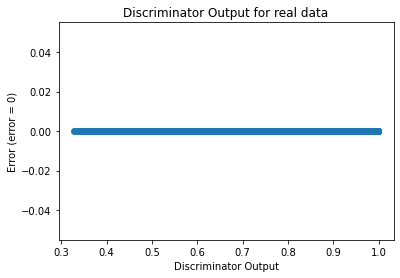

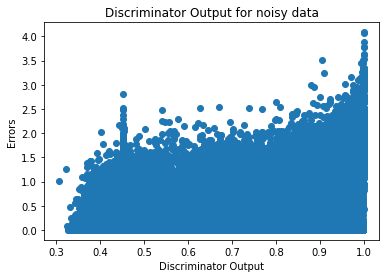

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
